# <font color=darkred> Windy Gridworld policy improvement </font>

## <font color=darkblue> Iterative policy improvement on a "windy gridworld" example </font>

The objective is to randomly initialize the policy and then to alternate between policy improvement and policy evaluation : 
- policy improvement is part of the control problem. For a particular state s, if the policy is to go up, then we are trying to go left, right or down and if the state-value is bigger, then we change the policy for this particular state to this new action. 
- policy evaluation : when an action is changed, then the policy is different so the value table needs to be updated. This is the aim of this prediction problem, calculate the value table, being given a policy. 

We are also choosing to implement a step cost, which mean each step has a little negative reward compared to the rewards of the winning and the losing states. Otherwise, it seems obvious that the better policy would be to simply go down on case $(1,2)$, leading to a longer path to the winning state. Plus, this windy state being the only probabilistic state, not implementing step cost would not be interesting. 

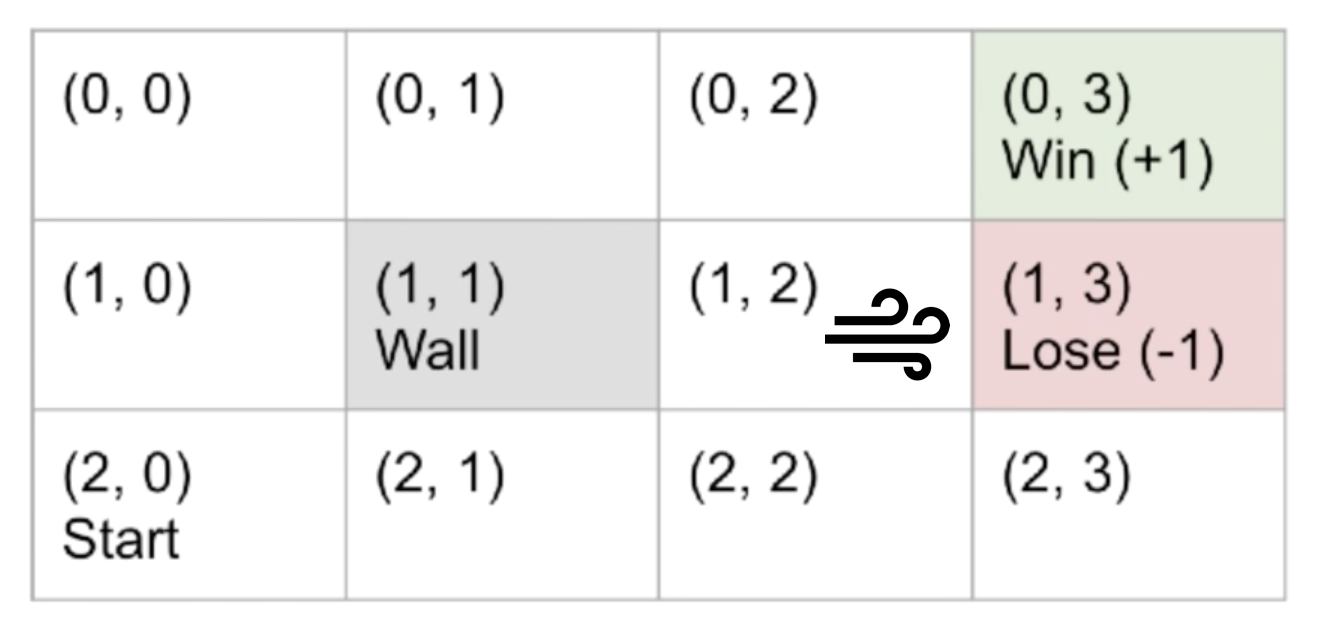

In [8]:
import numpy as np
ACTION_SPACE=['U','D','L','R']

There is no longer the $get$_$next$_$state()$ function because states are now probabilistic. 

In [9]:
class Windy_gridworld:
    def __init__(self, row, col, start):
        self.rows=row
        self.cols=col
        self.i=start[0]
        self.j=start[1]
        
    def set(self, rewards, actions, probs):
        self.reward = rewards
        self.action = actions
        self.probs = probs
        
    #set the state to s for the gridworld object
    def set_state(self,s): 
        self.i=s[0]
        self.j=s[1]
    
    #returns the current state of the grid
    def current_state(self):
        return((self.i,self.j))
    
    #returns True if the state s is a terminal state (i.e: not in the action dictionnary)
    def is_terminal(self,s):
        return(s not in self.action.keys())
    
    #return the reward after the action was taking into account (by default reward is 0)
    def move(self,a):
        s = (self.i,self.j)
        a = action 
        
        next_state_dict = self.probs[(s,a)]
        next_states = list(next_state_dict.keys())
        next_probs = list(next_state_dict.values())
        
        s2 = np.random.choice(next_states,1,p=next_probs)
        self.i,self.j = s2[0],s2[1]
        return(self.reward.get(s2,0))
    
    def game_over(self):
        return((self.i,self.j) in self.reward)
    
    def all_states(self):
        return(set(self.action.keys() | self.reward.keys()))

In [28]:
def windygrid(step_cost):
    g = Windy_gridworld(3,4,[2,0])
    rewards = {(0,3):+1,
               (1,3):-1,
               (0,0):step_cost,
               (0,1):step_cost,
               (0,2):step_cost,
               (1,0):step_cost,
               (1,2):step_cost,
               (2,0):step_cost,
               (2,1):step_cost,
               (2,2):step_cost,
               (2,3):step_cost}
    
    actions = {(0,0):('R','D'),
               (0,1):('R','L'),
               (0,2):('D','R','L'),
               (1,0):('U','D'),
               (1,2):('U','D','R'),
               (2,0):('U','R'),
               (2,1):('R','L'),
               (2,2):('U','R','L'),
               (2,3):('U','L')}
    probs = {
    ((2, 0), 'U'): {(1, 0): 1.0},
    ((2, 0), 'D'): {(2, 0): 1.0},
    ((2, 0), 'L'): {(2, 0): 1.0},
    ((2, 0), 'R'): {(2, 1): 1.0},
    ((1, 0), 'U'): {(0, 0): 1.0},
    ((1, 0), 'D'): {(2, 0): 1.0},
    ((1, 0), 'L'): {(1, 0): 1.0},
    ((1, 0), 'R'): {(1, 0): 1.0},
    ((0, 0), 'U'): {(0, 0): 1.0},
    ((0, 0), 'D'): {(1, 0): 1.0},
    ((0, 0), 'L'): {(0, 0): 1.0},
    ((0, 0), 'R'): {(0, 1): 1.0},
    ((0, 1), 'U'): {(0, 1): 1.0},
    ((0, 1), 'D'): {(0, 1): 1.0},
    ((0, 1), 'L'): {(0, 0): 1.0},
    ((0, 1), 'R'): {(0, 2): 1.0},
    ((0, 2), 'U'): {(0, 2): 1.0},
    ((0, 2), 'D'): {(1, 2): 1.0},
    ((0, 2), 'L'): {(0, 1): 1.0},
    ((0, 2), 'R'): {(0, 3): 1.0},
    ((2, 1), 'U'): {(2, 1): 1.0},
    ((2, 1), 'D'): {(2, 1): 1.0},
    ((2, 1), 'L'): {(2, 0): 1.0},
    ((2, 1), 'R'): {(2, 2): 1.0},
    ((2, 2), 'U'): {(1, 2): 1.0},
    ((2, 2), 'D'): {(2, 2): 1.0},
    ((2, 2), 'L'): {(2, 1): 1.0},
    ((2, 2), 'R'): {(2, 3): 1.0},
    ((2, 3), 'U'): {(1, 3): 1.0},
    ((2, 3), 'D'): {(2, 3): 1.0},
    ((2, 3), 'L'): {(2, 2): 1.0},
    ((2, 3), 'R'): {(2, 3): 1.0},
    ((1, 2), 'U'): {(0, 2): 0.5, (1, 3): 0.5},
    ((1, 2), 'D'): {(2, 2): 1.0},
    ((1, 2), 'L'): {(1, 2): 1.0},
    ((1, 2), 'R'): {(1, 3): 1.0},
  }
    
    g.set(rewards,actions,probs)
    return(g)

In [11]:
def print_value(V,g):
    for i in range(g.rows):
        print("----------------------------")
        for j in range(g.cols):
            v = V.get((i,j),0)
            if v>=0:
                print(" %.2f |" %v, end="")
            else:
                print("%.2f |" %v, end="")
        print()

In [12]:
def print_policy(P,g):
    for i in range(g.rows):
        print("----------------")
        for j in range(g.cols):
            p = P.get((i,j),' ')
            print(" %s |" %p, end="")
        print()

In [13]:
def get_transition_probs_and_rewards(grid):

    #This dictionnary gives the distributions p(s'|s,a). 
    #If the key is (s,a,s'), then transition_probs[(s,a,s')] is p(s'|s,a)
    transition_probs={}

    #We use here deterministic rewards. 
    #If the key is (s,a,s'), then rewards[(s,a,s')] is the reward of state s'
    rewards={}

    for key,value in grid.probs.items():
        for k,v in value.items():
            (s,a),s2,p=key,k,v
            transition_probs[(s,a,s2)]=p
            rewards[s,a,s2]=grid.reward.get(s2,0)
    return(transition_probs,rewards)

In [25]:
def iterative_policy_evaluation(policy,g):
    global threshold, gamma
    
    # initialize V(s) to 0
    V={}
    for s in g.all_states():
        V[s]=0
    
    #Discount factor
    gamma = 0.9
    
    #threshold argument to stop the loop when convergence
    threshold = 0.001
    
    #transition probabilities and rewards
    transition_probs,rewards = get_transition_probs_and_rewards(g)
    
    #Main loop
    it=0
    while True:
        biggest_change = 0
        for s in g.all_states():
            if not g.is_terminal(s):
                old_v=V[s]
                new_v=0
                for a in ACTION_SPACE:
                    for s2 in g.all_states():
                        action_probs=1 if policy.get(s)==a else 0
                        r = rewards.get((s,a,s2),0) #reward is 0 if not specified
                        new_v += action_probs*transition_probs.get((s,a,s2),0)*(r+gamma*V[s2])
                        
                #after done getting the new value, update the V-table
                V[s]=new_v
                #print("For state ",s,"the value function equals ", V[s])
                biggest_change = max(biggest_change,np.abs(V[s]-old_v))
                
        it+=1       
        #print_value(V,g)
        #print("Iteration: ",it,"biggest change: ", biggest_change )
        #print()
        #print()
        if biggest_change <= threshold: 
            break
            
    return(V)

## <font color=darkblue> First case : when there is no step cost </font>

We can imagine that the policy found will be the one where when the agent arrives at case $(1,2)$, it comes back all the way to the left of the wall to evitate to have a negative state value. 

In [29]:
#initializing the grid and its transition probabilities and rewards
windy_grid = windygrid(0)
transition_probs, rewards = get_transition_probs_and_rewards(windy_grid)

#randomly initialize the policy
policy = {}
for s in windy_grid.action.keys():
    policy[s]=np.random.choice(ACTION_SPACE)

#Evaluate the value of each state given this initialized policy
V = iterative_policy_evaluation(policy, windy_grid)

#print the initial policy and value table 
print("The initial policy is the following one :")
print_policy(policy,windy_grid)
print("")

print("The initial value table is the following one :")
print_value(V,windy_grid)

The initial policy is the following one :
----------------
 L | U | R |   |
----------------
 R |   | U |   |
----------------
 U | L | D | L |

The initial value table is the following one :
----------------------------
 0.00 | 0.00 | 1.00 | 0.00 |
----------------------------
 0.00 | 0.00 |-0.05 | 0.00 |
----------------------------
 0.00 | 0.00 | 0.00 | 0.00 |


In [30]:
while True :
    is_policy_converged = True
    for s in windy_grid.action.keys():
        old_a = policy[s]
        new_a = None
        best_value = float('-inf')

        for a in ACTION_SPACE:
            new_value=0
            for s2 in windy_grid.all_states():
                r = rewards.get((s,a,s2),0)
                new_value+=transition_probs.get((s,a,s2),0)*(r+gamma*V[s2])
            if new_value>best_value:
                best_value=new_value
                new_a = a
                
        #if a better action is found, then the policy changes and the value table needs to be updated
        if new_a != old_a : 
            policy[s]=new_a
            V = iterative_policy_evaluation(policy,windy_grid)
            is_policy_converged=False
            
    #if the for loop is completed, and no action was changed on any state, it means 
    #the current policy is the optimal one
    if is_policy_converged: break
        

print("The best policy found is the following one :")   
print_policy(policy,windy_grid)
print("")
print("The corresponding value table is the following one :")   
print_value(V,windy_grid)
        

The best policy found is the following one :
----------------
 R | R | R |   |
----------------
 U |   | D |   |
----------------
 U | L | L | L |

The corresponding value table is the following one :
----------------------------
 0.81 | 0.90 | 1.00 | 0.00 |
----------------------------
 0.73 | 0.00 | 0.48 | 0.00 |
----------------------------
 0.66 | 0.59 | 0.53 | 0.48 |


## <font color=darkblue> Conclusion and remarks </font>

Here we can see that as taking a step is not penalized, the policy says to go down on the "windy case". But it implies to make more steps to go to the winning state. If each step has a cost, will it still go down or will he be willing to take the risk and go up ? That what wa are going to find. 

## <font color=darkblue> 2nd case : step cost = $-0.1$ </font>

In [33]:
#initializing the grid and its transition probabilities and rewards
windy_grid = windygrid(-0.1)
transition_probs, rewards = get_transition_probs_and_rewards(windy_grid)

#randomly initialize the policy
policy = {}
for s in windy_grid.action.keys():
    policy[s]=np.random.choice(ACTION_SPACE)

#Evaluate the value of each state given this initialized policy
V = iterative_policy_evaluation(policy, windy_grid)

#print the initial policy and value table 
print("The initial policy is the following one :")
print_policy(policy,windy_grid)
print("")

print("The initial value table is the following one :")
print_value(V,windy_grid)

while True :
    is_policy_converged = True
    for s in windy_grid.action.keys():
        old_a = policy[s]
        new_a = None
        best_value = float('-inf')

        for a in ACTION_SPACE:
            new_value=0
            for s2 in windy_grid.all_states():
                r = rewards.get((s,a,s2),0)
                new_value+=transition_probs.get((s,a,s2),0)*(r+gamma*V[s2])
            if new_value>best_value:
                best_value=new_value
                new_a = a
                
        #if a better action is found, then the policy changes and the value table needs to be updated
        if new_a != old_a : 
            policy[s]=new_a
            V = iterative_policy_evaluation(policy,windy_grid)
            is_policy_converged=False
            
    #if the for loop is completed, and no action was changed on any state, it means 
    #the current policy is the optimal one
    if is_policy_converged: break
        
print()
print("The best policy found is the following one :")   
print_policy(policy,windy_grid)
print("")
print("The corresponding value table is the following one :")   
print_value(V,windy_grid)

The initial policy is the following one :
----------------
 U | U | U |   |
----------------
 R |   | U |   |
----------------
 U | L | U | U |

The initial value table is the following one :
----------------------------
-0.99 |-0.99 |-0.99 | 0.00 |
----------------------------
-0.99 | 0.00 |-1.00 | 0.00 |
----------------------------
-0.99 |-0.99 |-1.00 |-1.00 |

The best policy found is the following one :
----------------
 R | R | R |   |
----------------
 U |   | D |   |
----------------
 U | L | L | L |

The corresponding value table is the following one :
----------------------------
 0.62 | 0.80 | 1.00 | 0.00 |
----------------------------
 0.46 | 0.00 |-0.04 | 0.00 |
----------------------------
 0.31 | 0.18 | 0.06 |-0.04 |


## <font color=darkblue> Conclusion and remarks </font>

We can see here that because of the step cost, the value of the "windy_state" becomes negative. But we can also state that it is preferable to go down in this state. This means that the agent is not willing to take the risk of going up because it will lead to a more negative value. 

## <font color=darkblue> 3nd case : step cost = $-0.2$ </font>

In [34]:
#initializing the grid and its transition probabilities and rewards
windy_grid = windygrid(-0.2)
transition_probs, rewards = get_transition_probs_and_rewards(windy_grid)

#randomly initialize the policy
policy = {}
for s in windy_grid.action.keys():
    policy[s]=np.random.choice(ACTION_SPACE)

#Evaluate the value of each state given this initialized policy
V = iterative_policy_evaluation(policy, windy_grid)

#print the initial policy and value table 
print("The initial policy is the following one :")
print_policy(policy,windy_grid)
print("")

print("The initial value table is the following one :")
print_value(V,windy_grid)

while True :
    is_policy_converged = True
    for s in windy_grid.action.keys():
        old_a = policy[s]
        new_a = None
        best_value = float('-inf')

        for a in ACTION_SPACE:
            new_value=0
            for s2 in windy_grid.all_states():
                r = rewards.get((s,a,s2),0)
                new_value+=transition_probs.get((s,a,s2),0)*(r+gamma*V[s2])
            if new_value>best_value:
                best_value=new_value
                new_a = a
                
        #if a better action is found, then the policy changes and the value table needs to be updated
        if new_a != old_a : 
            policy[s]=new_a
            V = iterative_policy_evaluation(policy,windy_grid)
            is_policy_converged=False
            
    #if the for loop is completed, and no action was changed on any state, it means 
    #the current policy is the optimal one
    if is_policy_converged: break
        
print()
print("The best policy found is the following one :")   
print_policy(policy,windy_grid)
print("")
print("The corresponding value table is the following one :")   
print_value(V,windy_grid)

The initial policy is the following one :
----------------
 U | D | L |   |
----------------
 U |   | L |   |
----------------
 R | L | D | R |

The initial value table is the following one :
----------------------------
-1.99 |-1.99 |-1.99 | 0.00 |
----------------------------
-1.99 | 0.00 |-1.99 | 0.00 |
----------------------------
-2.00 |-2.00 |-1.99 |-1.99 |

The best policy found is the following one :
----------------
 R | R | R |   |
----------------
 U |   | U |   |
----------------
 U | L | U | L |

The corresponding value table is the following one :
----------------------------
 0.43 | 0.70 | 1.00 | 0.00 |
----------------------------
 0.19 | 0.00 |-0.15 | 0.00 |
----------------------------
-0.03 |-0.23 |-0.34 |-0.50 |


## <font color=darkblue> Conclusion and remarks </font>

Here we can see that the step cost is too big to go backwards, so the agent takes the risk to go up even if there is a non-null rpobability to be pushed in the losing state. 